In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [154]:
dataset = pd.read_csv('newData.csv')
dataset = dataset.iloc[11:, 1:-1] * 10**5
dataset = dataset - 131904
dataset

,last open10,last high10,last low10,last open9,last high9,last low9,last open8,last high8,last low8,last open7,...,last open1,last high1,last low1,last open,last high,last low,open,high,low,close
11,-19550.0,-19550.0,-19738.0,-19662.0,-19628.0,-19837.0,-19765.0,-19649.0,-19874.0,-19812.0,...,-18521.0,-18242.0,-18716.0,-18460.0,-18258.0,-18791.0,-18364.0,-17394.0,-18546.0,-17536.0
12,-19662.0,-19628.0,-19837.0,-19765.0,-19649.0,-19874.0,-19812.0,-19573.0,-19855.0,-19710.0,...,-18460.0,-18258.0,-18791.0,-18364.0,-17394.0,-18546.0,-17537.0,-17456.0,-17734.0,-17630.0
13,-19765.0,-19649.0,-19874.0,-19812.0,-19573.0,-19855.0,-19710.0,-19004.0,-19774.0,-19186.0,...,-18364.0,-17394.0,-18546.0,-17537.0,-17456.0,-17734.0,-17709.0,-17630.0,-17889.0,-17713.0
14,-19812.0,-19573.0,-19855.0,-19710.0,-19004.0,-19774.0,-19186.0,-18885.0,-19247.0,-19106.0,...,-17537.0,-17456.0,-17734.0,-17709.0,-17630.0,-17889.0,-17734.0,-17571.0,-18002.0,-17909.0
15,-19710.0,-19004.0,-19774.0,-19186.0,-18885.0,-19247.0,-19106.0,-18900.0,-19132.0,-19012.0,...,-17709.0,-17630.0,-17889.0,-17734.0,-17571.0,-18002.0,-17948.0,-17646.0,-18130.0,-17740.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28855,-16376.0,-16300.0,-16447.0,-16340.0,-16235.0,-16541.0,-16474.0,-16116.0,-16499.0,-16123.0,...,-16022.0,-15880.0,-16057.0,-15925.0,-15903.0,-16022.0,-15964.0,-15784.0,-15966.0,-15822.0
28856,-16340.0,-16235.0,-16541.0,-16474.0,-16116.0,-16499.0,-16123.0,-15929.0,-16124.0,-15943.0,...,-15925.0,-15903.0,-16022.0,-15964.0,-15784.0,-15966.0,-15822.0,-15715.0,-15909.0,-15870.0
28857,-16474.0,-16116.0,-16499.0,-16123.0,-15929.0,-16124.0,-15943.0,-15891.0,-15979.0,-15912.0,...,-15964.0,-15784.0,-15966.0,-15822.0,-15715.0,-15909.0,-15871.0,-15780.0,-16012.0,-15981.0
28858,-16123.0,-15929.0,-16124.0,-15943.0,-15891.0,-15979.0,-15912.0,-15895.0,-16014.0,-16004.0,...,-15822.0,-15715.0,-15909.0,-15871.0,-15780.0,-16012.0,-15981.0,-15801.0,-16011.0,-15951.0


In [155]:
x = dataset.iloc[:, :34].values
y = dataset.iloc[:,  34].values
from xgboost import XGBRegressor
regressorHigh = XGBRegressor()
regressorHigh.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [156]:
yPredHigh = regressorHigh.predict(x)
np.set_printoptions(precision=2)
print(np.concatenate((yPredHigh.reshape(len(yPredHigh), 1), y.reshape(len(y), 1)), 1))

[[-18029.96 -17394.  ]
 [-17386.47 -17456.  ]
 [-17497.03 -17630.  ]
 ...
 [-15594.95 -15780.  ]
 [-15892.55 -15801.  ]
 [-15892.55 -15844.  ]]


In [157]:
from sklearn.metrics import r2_score
r2_score(y, yPredHigh)

0.999816616689551

In [158]:
diffHigh = []
for i in range(len(y)):
    diffHigh.append(abs(y[i] - yPredHigh[i]))
print(max(diffHigh))
print(np.mean(diffHigh))

1874.6488037109375
115.38517521092702


In [159]:
x = dataset.iloc[:, :34].values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
y = dataset.iloc[:,  35].values
from xgboost import XGBRegressor
regressorLow = XGBRegressor()
regressorLow.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [160]:
yPredLow = regressorLow.predict(x)
np.set_printoptions(precision=2)
print(np.concatenate((yPredLow.reshape(len(yPredLow), 1), y.reshape(len(y), 1)), 1))

[[-18653.59 -18546.  ]
 [-17792.46 -17734.  ]
 [-17917.61 -17889.  ]
 ...
 [-15947.82 -16012.  ]
 [-16239.36 -16011.  ]
 [-16239.36 -15971.  ]]


In [161]:
from sklearn.metrics import r2_score
r2_score(y, yPredLow)

0.9998178015463056

In [162]:
diffLow = []
for i in range(len(y)):
    diffLow.append(abs(y[i] - yPredLow[i]))
print(max(diffLow))
print(np.mean(diffLow))

1666.1630859374854
115.0607443211905


In [163]:
x = dataset.iloc[:, :34].values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
x = np.concatenate((x, yPredLow.reshape(len(yPredLow), 1)), 1)
y = dataset.iloc[:,  36].values
from xgboost import XGBRegressor
regressorClose = XGBRegressor()
regressorClose.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [164]:
yPredClose = regressorClose.predict(x)
np.set_printoptions(precision=2)
print(np.concatenate((yPredClose.reshape(len(yPredClose), 1), y.reshape(len(y), 1)), 1))

[[-18125.42 -17536.  ]
 [-17627.7  -17630.  ]
 [-17740.1  -17713.  ]
 ...
 [-15828.61 -15981.  ]
 [-15828.61 -15951.  ]
 [-15828.61 -15864.  ]]


In [165]:
from sklearn.metrics import r2_score
r2_score(y, yPredClose)

0.9997246429416707

In [166]:
diffClose = []
for i in range(len(y)):
    diffClose.append(abs(y[i] - yPredClose[i]))
print(max(diffClose))
print(np.mean(diffClose))

1558.431640625
142.5157074985803


In [167]:
testSet = pd.read_csv("newData.csv")
testSet = testSet.iloc[11:, :]
openVal = testSet.iloc[:, 34]
closeVal = testSet.iloc[:, 37]
openVal = openVal * 10**5
closeVal = closeVal * 10**5
openVal = openVal.values
closeVal = closeVal.values
test = []
for i in range(len(openVal)):
    if closeVal[i] - openVal[i] < 0:
        test.append(0)
    else:
        test.append(1)
print(openVal)
print(closeVal)
print(test)

[113540. 114367. 114195. ... 116033. 115923. 115952.]
[114368. 114274. 114191. ... 115923. 115953. 116040.]
[1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 

In [168]:
x = dataset.iloc[:, :34].values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
x = np.concatenate((x, yPredLow.reshape(len(yPredLow), 1)), 1)
x = np.concatenate((x, yPredClose.reshape(len(yPredClose), 1)), 1)
from xgboost import XGBClassifier
classifierAscending = XGBClassifier()
classifierAscending.fit(x, test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [169]:
from sklearn.metrics import confusion_matrix, accuracy_score
yPred = classifierAscending.predict(x)
cm = confusion_matrix(test, yPred)
print(cm)
accuracy_score(test, yPred)

[[10065  4134]
 [ 2205 12445]]


0.7802696800582343

In [170]:
prediction = []
openValues = dataset.iloc[:, 33]
openValues = np.array(openValues)
print(openValues.shape)
for i in range(len(yPredClose)):
    if yPredClose[i] > openValues[i]:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(test, prediction)
print(cm)
accuracy_score(test, prediction)

(28849,)
[[ 9807  4392]
 [ 4506 10144]]


0.6915664321120316

In [171]:
diffHigh = np.array(diffHigh)
diffHigh = diffHigh.reshape(len(diffHigh), 1)
diffLow = np.array(diffLow)
diffLow = diffLow.reshape(len(diffLow), 1)
diffClose = np.array(diffClose)
diffClose = diffClose.reshape(len(diffClose), 1)
df = pd.DataFrame(np.array(diffClose))
diffHigh = np.array(diffHigh)
diffLow = np.array(diffLow)
df.insert(0, 'close error', diffClose)
df.insert(0, 'low error', diffLow)
df.insert(0, 'high error', diffHigh)
df.to_csv('errors.csv')

In [172]:
dataset = pd.read_csv('errors.csv')
dataset = dataset.iloc[:, 1:-1]
print(dataset)

       high error   low error  close error
0      635.962891  107.585938   589.421875
1       69.529297   58.464844     2.302734
2      132.966797   28.605469    27.097656
3       62.812500   52.484375    91.632812
4       60.398438    1.308594   127.677734
...           ...         ...          ...
28844  108.549805  279.709961     6.614258
28845  120.046875   47.110352    41.385742
28846  185.046875   64.180664   152.385742
28847   91.549805  228.358398   122.385742
28848   48.549805  268.358398    35.385742

[28849 rows x 3 columns]


In [173]:
x = []
for i in range(28849):
    x.append(i)

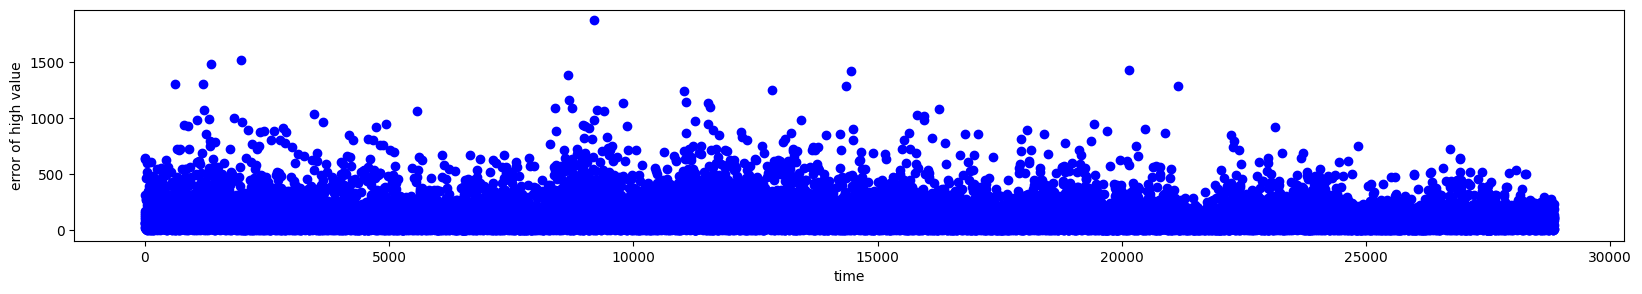

In [174]:
high = dataset.iloc[:, 0].values
plt.scatter(x=x, y=high, c='blue')
plt.xlabel('time')
plt.ylabel('error of high value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [175]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 100:
        counterHigh += 1
print(counterHigh)

16067


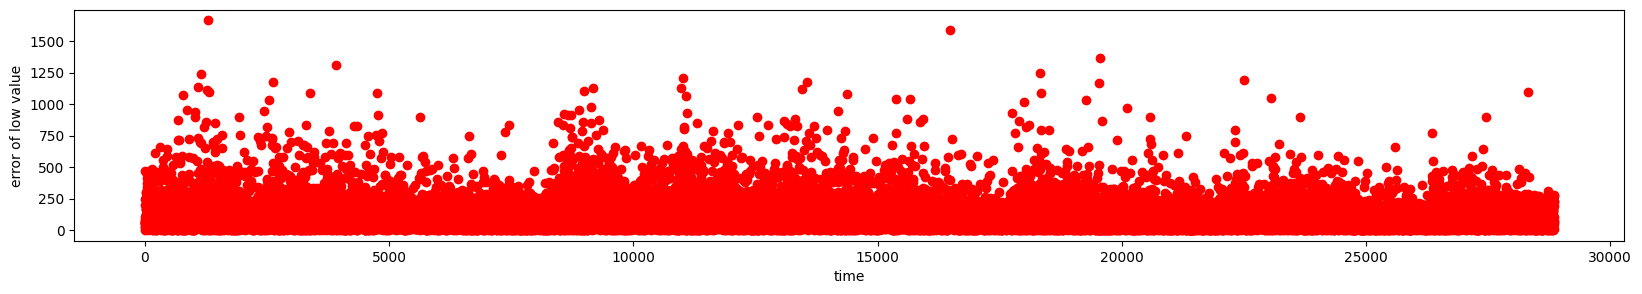

In [176]:
low = dataset.iloc[:, 1].values
plt.scatter(x=x, y=low, c='red')
plt.xlabel('time')
plt.ylabel('error of low value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [177]:
counterLow = 0
for i in range(len(low)):
    if low[i] < 100:
        counterLow+=1
print(counterLow)

16003


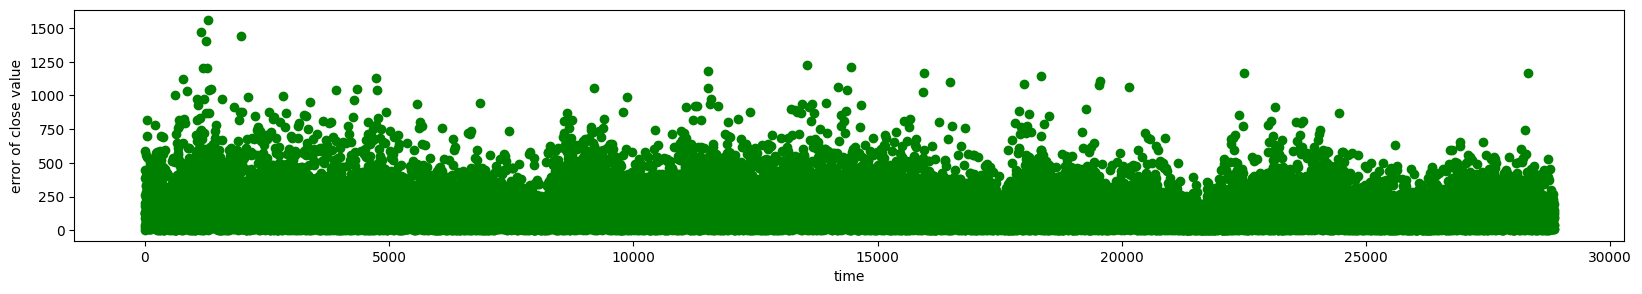

In [178]:
close = dataset.iloc[:, 2].values
plt.scatter(x=x, y=close, c='green')
plt.xlabel('time')
plt.ylabel('error of close value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [179]:
counterClose = 0
for i in range(len(close)):
    if close[i] < 100:
        counterClose+=1
print(counterClose)

14154


In [180]:
print("percent of under 100 for high is " + str((counterHigh/len(high))*100))
print("percent of under 100 for low is " + str((counterLow/len(low))*100))
print("percent of under 100 for close is " + str((counterClose/len(close))*100))

percent of under 100 for high is 55.69343824742625
percent of under 100 for low is 55.47159346944434
percent of under 100 for close is 49.06235918056085


In [181]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 200:
        counterHigh += 1
counterLow = 0
for i in range(len(low)):
    if low[i] < 200:
        counterLow+=1
counterClose = 0
for i in range(len(close)):
    if close[i] < 200:
        counterClose+=1
print("percent of under 200 for high is " + str((counterHigh/len(high))*100))
print("percent of under 200 for low is " + str((counterLow/len(low))*100))
print("percent of under 200 for close is " + str((counterClose/len(close))*100))

percent of under 200 for high is 85.91978924746093
percent of under 200 for low is 85.85392907899754
percent of under 200 for close is 76.12048944504141


In [182]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 150:
        counterHigh += 1
counterLow = 0
for i in range(len(low)):
    if low[i] < 150:
        counterLow+=1
counterClose = 0
for i in range(len(close)):
    if close[i] < 150:
        counterClose+=1
print("percent of under 150 for high is " + str((counterHigh/len(high))*100))
print("percent of under 150 for low is " + str((counterLow/len(low))*100))
print("percent of under 150 for close is " + str((counterClose/len(close))*100))

percent of under 150 for high is 74.4913168567368
percent of under 150 for low is 74.39425976636971
percent of under 150 for close is 65.2327637006482
